## Cas pratique 1 : classification des fromages
Importez la base carac_fromages.txt et affichez quelques stats descriptives sur ses variables

On cherche à voir si certains fromages sont plus proches que d'autres en fonction de leurs caractéristiques.

- Transformez les variables numériques de manière à pouvoir mener une analyse en k-means.  
- Justifiez un choix de nombre de classes avec cette méthode et opérez le clustering de ces données.  
- Observez les noms des fromages d'une même classe. Trouvez-vous logique qu'ils soient associés?  
- Faites une classification avec DBSCAN et comparez les résultats.  

In [1]:
import pandas as pd

fromages = pd.read_table("data/carac_fromages.txt")
fromages.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


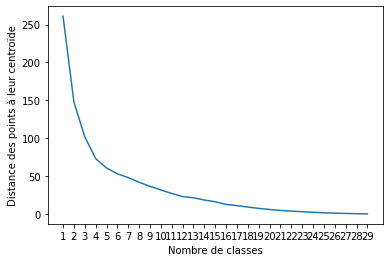

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# On met dans Xfrom les variables numériques transformées en arrays
Xfrom = fromages.iloc[:, range(1, len(fromages.columns))]

# On change le format pour que scikitlearn tourne bien
Xfrom_numpy = Xfrom.to_numpy()

# On centre réduit
Xfrom_cr = StandardScaler().fit_transform(Xfrom)

# On affiche le graphe de l'inertie en fonction du nb de clusters
liste_iner = [KMeans(k).fit(Xfrom_cr).inertia_ for k in range(1, 30)]
plt.plot(range(1, 30), liste_iner)
plt.xlabel("Nombre de classes")
plt.ylabel("Distance des points à leur centroïde")
plt.xticks(ticks=range(1, 30))
plt.show()

In [15]:
import sklearn
sklearn.__version__

'0.22.1'

In [16]:
# On choisit 5 classes
classes_from = KMeans(5).fit_predict(Xfrom_cr)


# On affiche les résultats des classes et leurs noms
pd.DataFrame(classes_from, fromages.iloc[:, 0]).sort_values(0)

,0
Fromages,
Beaufort,0
Parmesan,0
Emmental,0
Comte,0
Edam,0
Yaourtlaitent.nat.,1
Petitsuisse40,1
Fr.frais40nat.,1
Fr.frais20nat.,1


In [17]:
# DBSCAN
# On crée une fonction en fonction de eps et min_samples
def dbscan(dist = 1.5, n_min = 2):
    # On choisit 5 classes
    classesDB_from = DBSCAN(eps = dist, min_samples = n_min).fit_predict(Xfrom_cr)
    
    
    # on sort les indexs triés des groupes
    import numpy as np
    idg = np.argsort(classesDB_from)
    
    # On affiche les résultats des classes et leurs noms
    return(pd.DataFrame(classesDB_from[idg],fromages.iloc[idg, 0]))
    


In [18]:
# Une astuce pour avoir une idée de l'ordre de grandeur des distances : 
from scipy.spatial.distance import pdist
import pandas as pd


pd.DataFrame(pdist(Xfrom_cr)).describe()

,0
count,406.000000
mean,3.935931
std,1.777382
min,0.735690
25%,2.596051
50%,3.604789
75%,5.281380
max,8.219281


In [19]:
# On regarde les résultats en changeant les paramètres : 
dbscan(1, 2)

,0
Fromages,
CarredelEst,-1
Rocquefort,-1
Pyrenees,-1
Parmesan,-1
Maroilles,-1
Fr.frais20nat.,-1
Vacherin,-1
Fr.chevrepatemolle,-1
Emmental,-1


In [20]:
dbscan(1.5, 2)

,0
Fromages,
CarredelEst,-1
Rocquefort,-1
Parmesan,-1
Fr.chevrepatemolle,-1
Edam,-1
Coulomniers,-1
Cheddar,-1
Fr.fondu.45,-1
Chabichou,-1


In [21]:
dbscan(2, 2)

,0
Fromages,
Bleu,-1
Parmesan,-1
Fr.chevrepatemolle,-1
CarredelEst,0
Tome,0
SaintPaulin,0
Rocquefort,0
Reblochon,0
Pyrenees,0


In [10]:
dbscan(3, 2)

,0
Fromages,
CarredelEst,0
Tome,0
SaintPaulin,0
Rocquefort,0
Reblochon,0
Pyrenees,0
PontlEveque,0
Parmesan,0
Morbier,0
